In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

from keras.datasets import mnist
from keras.models import Sequential

from keras.layers import Dense, Dropout, Activation
from tensorflow.python.keras.utils import np_utils

Loading the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 3s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


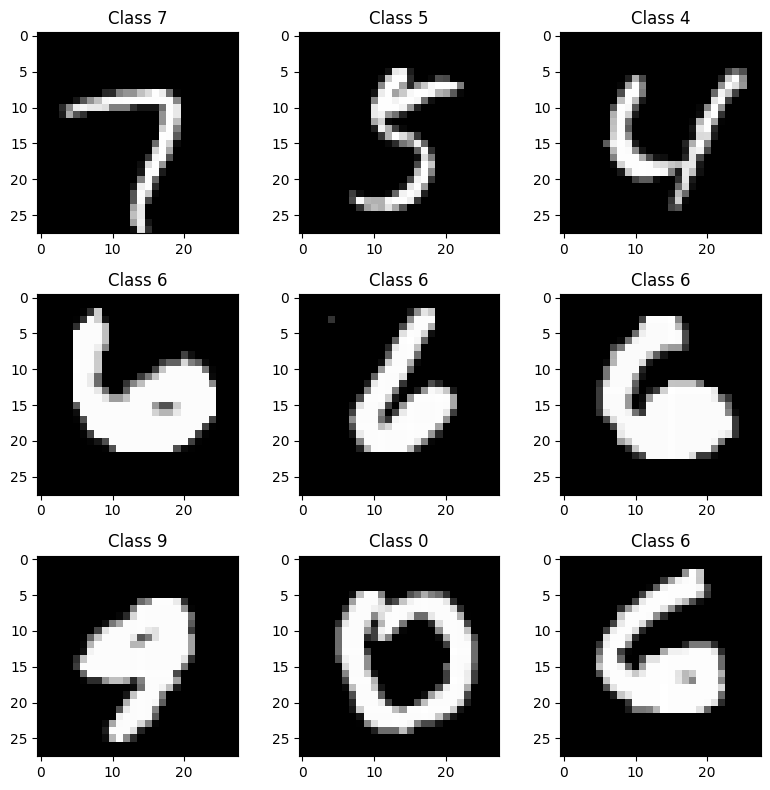

In [4]:
plt.rcParams['figure.figsize'] = (8,8)

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

Viewing One image

In [6]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

matprint(X_train[num])

0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0    0    0    0  144  254  201    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    0    0   52  164  241  251  253  199    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0    0    5   94  241  253  253  253  253  248   72    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0    0   66  216  253  254  253  253  253  253  194   55    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0    0    0   68  234  253  253  254  253  228  186   81   14    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0   43  153  233  253  253  253  229  143   42    0    0    0    0    0    0  0  0  0  0  0  
0  0  0  0  0    0    0    0  20

Making the image into a 1D vector

In [7]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Building a 3-layered Neural Network

In [9]:
model = Sequential()

# First hidden layer

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Second Hidden layer

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# Output layer

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [10]:
# Using ADAM optimization

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Training the model

In [11]:
model.fit(X_train, Y_train,batch_size=128, epochs=5,verbose=1)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.2499 - accuracy: 0.9261
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1023 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0713 - accuracy: 0.9766
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0584 - accuracy: 0.9816
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0458 - accuracy: 0.9855


Evaluating the model

In [12]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.0576 - accuracy: 0.9815
Test score: 0.057603009045124054
Test accuracy: 0.9815000295639038


Plotting some correct and inncorrect predictions

313/313 [==============================] - 0s 984us/step


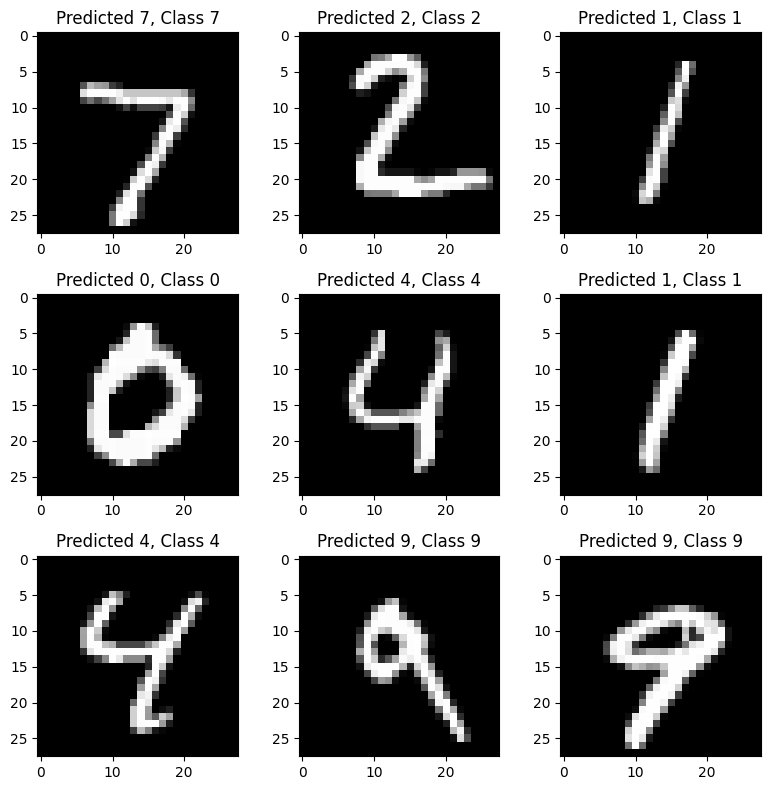

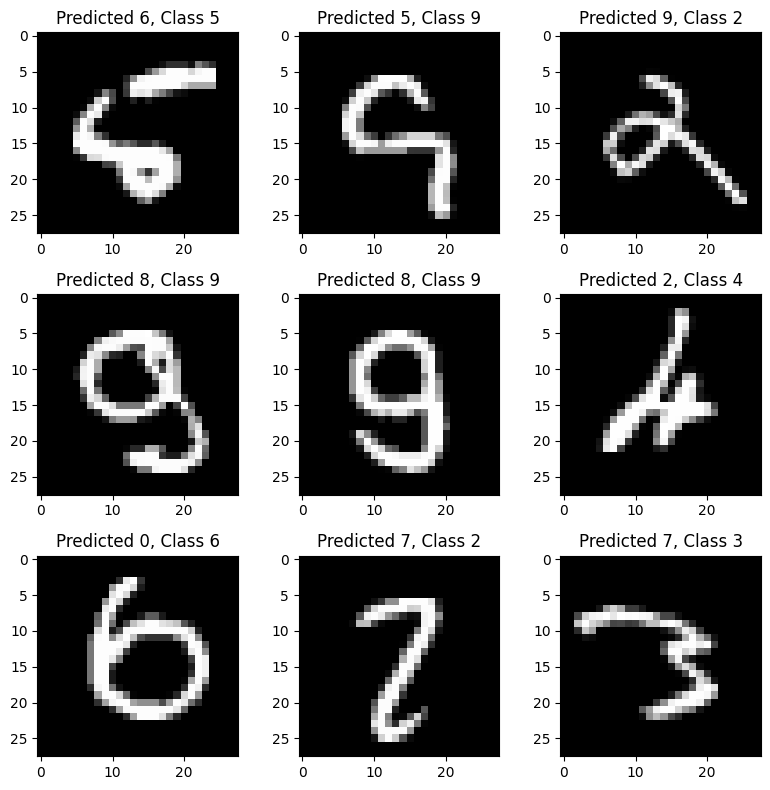

In [14]:
predict_x=model.predict(X_test) 
predicted_classes=np.argmax(predict_x,axis=1)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()

**Building a Deep CNN**

In [15]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

Reloading the data

In [16]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

nb_classes = 10

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [17]:
model = Sequential()

# Convolution Layer 1

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
convLayer01 = Activation('relu')
model.add(convLayer01)

# Convolution Layer 2

model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

# Convolution Layer 3

model.add(Conv2D(64,(3, 3)))
model.add(BatchNormalization(axis=-1))
convLayer03 = Activation('relu')
model.add(convLayer03)

# Convolution Layer 4

model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04 = MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

# Fully Connected Layer 5

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

# Fully Connected Layer 6 

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [18]:
# Using ADAM optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [19]:
# Data augmentation
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,height_shift_range=0.08, zoom_range=0.08)
test_gen = ImageDataGenerator()

# Batching
train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

Training the model

In [20]:
model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5


C:\Users\Balaji\AppData\Local\Temp\ipykernel_8624\3049383699.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1, validation_data=test_generator, validation_steps=10000//128)


468/468 [==============================] - 48s 100ms/step - loss: 0.1324 - accuracy: 0.9587 - val_loss: 0.0646 - val_accuracy: 0.9804
Epoch 2/5
468/468 [==============================] - 49s 105ms/step - loss: 0.0508 - accuracy: 0.9846 - val_loss: 0.0533 - val_accuracy: 0.9840
Epoch 3/5
468/468 [==============================] - 48s 103ms/step - loss: 0.0396 - accuracy: 0.9879 - val_loss: 0.0637 - val_accuracy: 0.9793
Epoch 4/5
468/468 [==============================] - 50s 106ms/step - loss: 0.0337 - accuracy: 0.9893 - val_loss: 0.0185 - val_accuracy: 0.9943
Epoch 5/5
468/468 [==============================] - 49s 104ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.0220 - val_accuracy: 0.9932


Evaluating the Model

In [21]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.0223 - accuracy: 0.9931
Test score: 0.02226904220879078
Test accuracy: 0.9930999875068665
